In [1]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import sklearn tools and metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
#Loading dataset
data = pd.read_csv('original_dataset.csv')

# EDA

In [3]:
#Getting a list of all columns and saving them as a list 'features'
features = list(data.columns)
features

['price',
 'crime_rate',
 'resid_area',
 'air_qual',
 'room_num',
 'age',
 'dist1',
 'dist2',
 'dist3',
 'dist4',
 'teachers',
 'poor_prop',
 'n_hos_beds',
 'n_hot_rooms',
 'rainfall',
 'parks',
 'airport',
 'waterbody',
 'bus_ter']

In [4]:
#removing 'price' from features
features.remove('price')

In [5]:
features

['crime_rate',
 'resid_area',
 'air_qual',
 'room_num',
 'age',
 'dist1',
 'dist2',
 'dist3',
 'dist4',
 'teachers',
 'poor_prop',
 'n_hos_beds',
 'n_hot_rooms',
 'rainfall',
 'parks',
 'airport',
 'waterbody',
 'bus_ter']

In [6]:
#assigning x and y
y = data.price
x = data[features]

In [7]:
x.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport,waterbody,bus_ter
0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,YES,River,YES
1,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,NO,Lake,YES
2,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,NO,None,YES
3,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,YES,Lake,YES
4,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,NO,Lake,YES


## Transforming certain variables

In [8]:
#Dummy coding categorical variables
i = pd.get_dummies(x.airport)
i

,NO,YES
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
501,1,0
502,0,1
503,1,0
504,0,1


In [9]:
#Adding the dummy variable into x
x = x.assign(airport_yes = i["YES"])
x.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport,waterbody,bus_ter,airport_yes
0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,YES,River,YES,1
1,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,NO,Lake,YES,0
2,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,NO,None,YES,0
3,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,YES,Lake,YES,1
4,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,NO,Lake,YES,0


In [10]:
#And deleting the categorical variable from x
x = x.drop('airport', axis=1)
x.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,waterbody,bus_ter,airport_yes
0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,River,YES,1
1,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,Lake,YES,0
2,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,None,YES,0
3,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,Lake,YES,1
4,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,Lake,YES,0


In [11]:
i = pd.get_dummies(x.waterbody)
i

,Lake,Lake and River,None,River
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
501,0,1,0,0
502,0,1,0,0
503,0,0,1,0
504,0,0,1,0


In [12]:
x = x.assign(lake = i["Lake"])
x = x.assign(river = i["River"])
x = x.assign(both = i["Lake and River"])
x.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,...,n_hos_beds,n_hot_rooms,rainfall,parks,waterbody,bus_ter,airport_yes,lake,river,both
0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,...,5.480,11.1920,23,0.049347,River,YES,1,0,1,0
1,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,...,7.332,12.1728,42,0.046146,Lake,YES,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,...,7.394,101.1200,38,0.045764,None,YES,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,...,9.268,11.2672,45,0.047151,Lake,YES,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,...,8.824,11.2896,55,0.039474,Lake,YES,0,1,0,0


In [13]:
x = x.drop(['waterbody'],axis=1)
x.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,bus_ter,airport_yes,lake,river,both
0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,YES,1,0,1,0
1,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,YES,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,YES,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,YES,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,YES,0,1,0,0


<AxesSubplot:xlabel='bus_ter', ylabel='Count'>

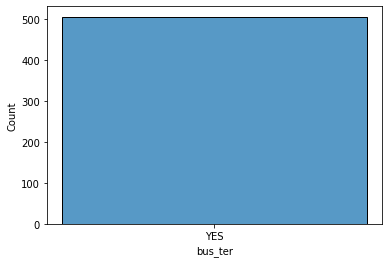

In [14]:
sns.histplot(x.bus_ter)

In [15]:
#Dropping constant variable
x = x.drop(['bus_ter'],axis=1)
x.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_yes,lake,river,both
0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,1,0,1,0
1,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0


In [16]:
#Since distance from employment hubs is overrepresented, we replace these columns with avg_dist
x['avg_dist'] = x[['dist1', 'dist2', 'dist3', 'dist4']].mean(axis=1)
x.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_yes,lake,river,both,avg_dist
0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,1,0,1,0,4.0875
1,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0,4.9675
2,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,0,0,0,0,4.9675
3,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0,6.0650
4,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0,6.0625


In [17]:
x = x.drop(['dist1','dist2','dist3','dist4'],axis=1)
x.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_yes,lake,river,both,avg_dist
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,1,0,1,0,4.0875
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0,4.9675
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,0,0,0,0,4.9675
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0,6.0650
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0,6.0625


## Missing data amputation

<AxesSubplot:>

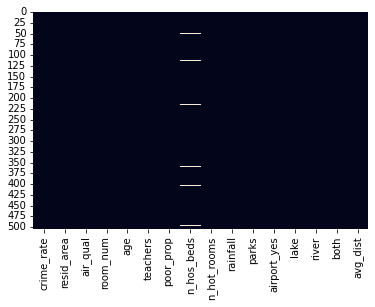

In [18]:
#taking a heatmap of missing values
sns.heatmap(x.isnull(),cbar=False)

In [19]:
x.n_hos_beds.mean()

7.899767068273092

<AxesSubplot:>

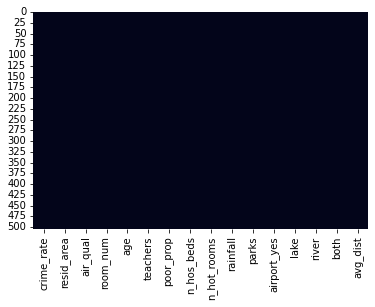

In [20]:
#replacing missing values with mean in n_hos_beds
x['n_hos_beds']=x['n_hos_beds'].fillna(7.9)
sns.heatmap(x.isnull(),cbar=False)

## Treating outliers

### z = x 'minus' categorical variables

In [21]:
z = x.drop(['lake','river','both','airport_yes'], axis=1)
z.columns.tolist()

['crime_rate',
 'resid_area',
 'air_qual',
 'room_num',
 'age',
 'teachers',
 'poor_prop',
 'n_hos_beds',
 'n_hot_rooms',
 'rainfall',
 'parks',
 'avg_dist']

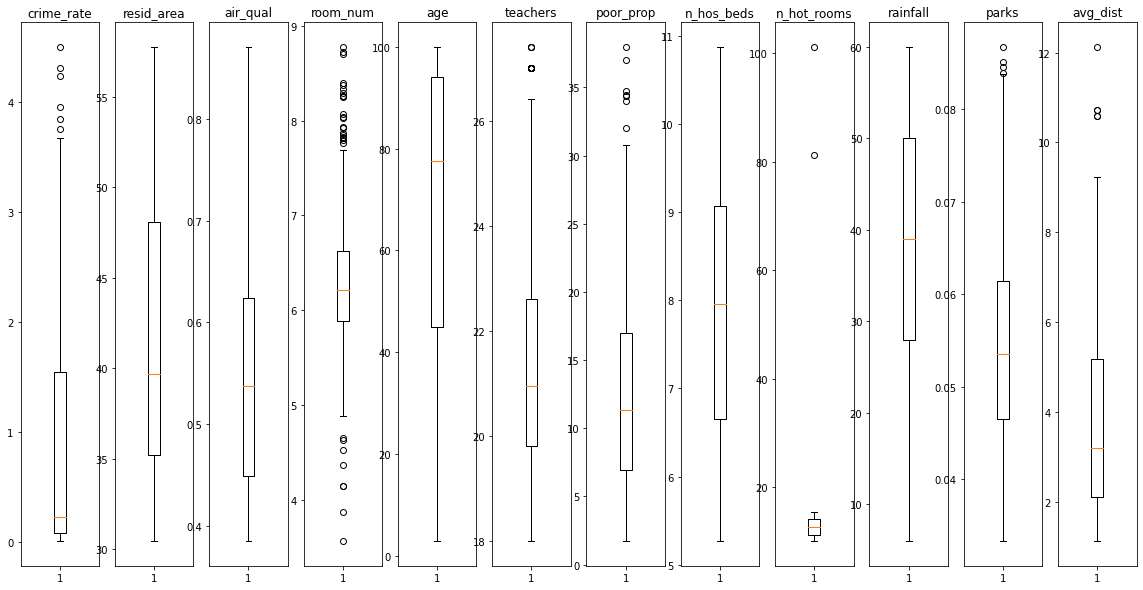

In [22]:
fig, axs = plt.subplots(1, len(z.columns), figsize = (20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(z.iloc[:,i])
    ax.set_title(z.columns[i])

array([[<AxesSubplot:title={'center':'crime_rate'}>,
        <AxesSubplot:title={'center':'room_num'}>],
       [<AxesSubplot:title={'center':'teachers'}>,
        <AxesSubplot:title={'center':'poor_prop'}>]], dtype=object)

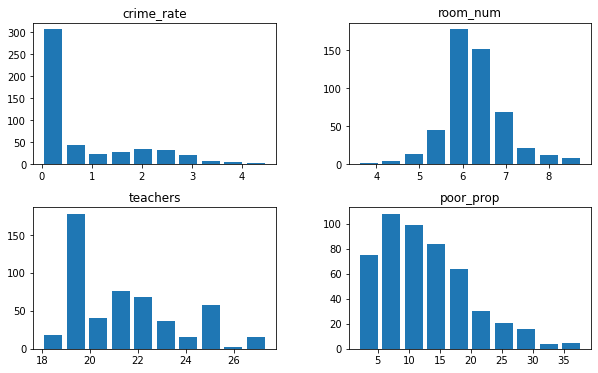

In [23]:
#Columns with possible outliers = crime_rate, room_num, teachers, poor_prop, n_hot_rooms, parks, avg_dist

#Taking a histogram of these columns to check whether the circle marks really qualify as outliers
x[['crime_rate','room_num','teachers','poor_prop']].hist(figsize=(10,6),grid=False,rwidth=0.8)

array([[<AxesSubplot:title={'center':'n_hot_rooms'}>,
        <AxesSubplot:title={'center':'parks'}>],
       [<AxesSubplot:title={'center':'avg_dist'}>, <AxesSubplot:>]],
      dtype=object)

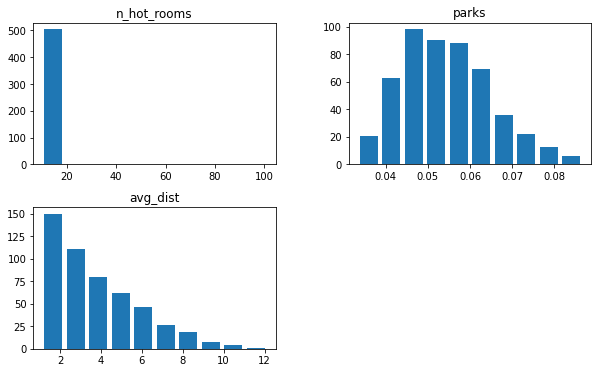

In [24]:
x[['n_hot_rooms', 'parks', 'avg_dist']].hist(figsize=(10,6),grid=False,rwidth=0.8)

In [25]:
#We detected outliers in n_hot_rooms

#Creating a list from n_hot_rooms and sorting the list to identify the outliers, un-hash the codes to check output
#lst = x.n_hot_rooms.tolist()
#lst.sort()
#lst

In [26]:
#Winsorizing outliers in n_hot_rooms

x['n_hot_rooms'].replace(to_replace=81.12,value=15.4, inplace=True)
x['n_hot_rooms'].replace(to_replace=101.12,value=15.4, inplace=True)

#Un-hash the codes to check output
#lst = x.n_hot_rooms.tolist()
#lst.sort()
#lst

In [27]:
x.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_yes,lake,river,both,avg_dist
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,1,0,1,0,4.0875
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0,4.9675
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,15.4000,38,0.045764,0,0,0,0,4.9675
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0,6.0650
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0,6.0625


In [28]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

Our x and y are ready!

## Correlations

<AxesSubplot:>

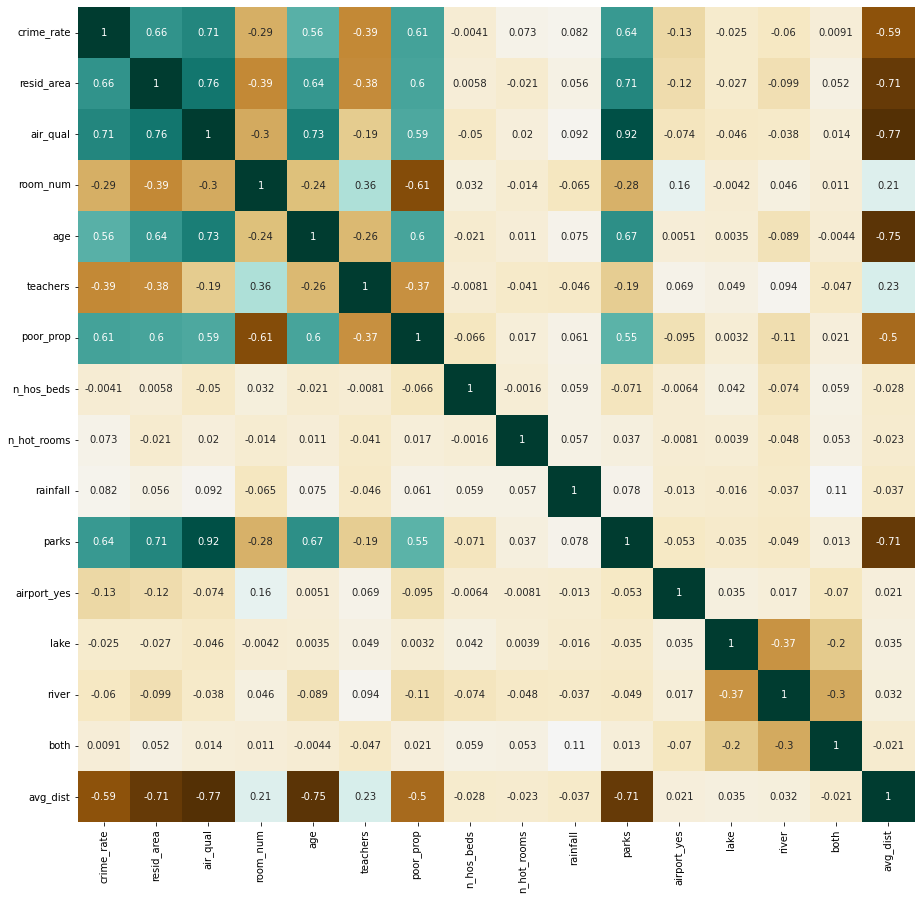

In [29]:
#Looking for multicollinearity, if any
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(), annot=True, cbar=False, cmap='BrBG')

In [30]:
#parks and air_qual are multicollinear (~0.92), so I'll drop air_qual from x

x = x.drop('air_qual',axis=1)
x.columns.tolist()

['crime_rate',
 'resid_area',
 'room_num',
 'age',
 'teachers',
 'poor_prop',
 'n_hos_beds',
 'n_hot_rooms',
 'rainfall',
 'parks',
 'airport_yes',
 'lake',
 'river',
 'both',
 'avg_dist']

In [31]:
#Correlation with y

#adding the price column to x
x['price']=y
x.columns.tolist()
x.head()

,crime_rate,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_yes,lake,river,both,avg_dist,price
0,0.006300,32.31,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,1,0,1,0,4.0875,24.0
1,0.026944,37.07,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0,4.9675,21.6
2,0.026924,37.07,7.185,61.1,22.2,4.03,7.394,15.4000,38,0.045764,0,0,0,0,4.9675,34.7
3,0.031857,32.18,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0,6.0650,33.4
4,0.066770,32.18,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0,6.0625,36.2


<AxesSubplot:>

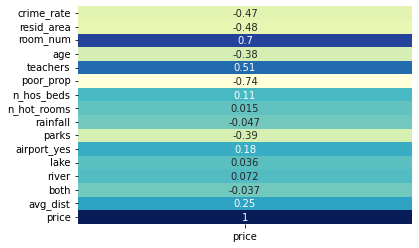

In [32]:
sns.heatmap(x.corr()[['price']], annot=True, cbar=False, cmap='YlGnBu')

In [33]:
#removing the price column from x
x=x.drop('price', axis=1)
x.head()

,crime_rate,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_yes,lake,river,both,avg_dist
0,0.006300,32.31,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,1,0,1,0,4.0875
1,0.026944,37.07,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0,4.9675
2,0.026924,37.07,7.185,61.1,22.2,4.03,7.394,15.4000,38,0.045764,0,0,0,0,4.9675
3,0.031857,32.18,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0,6.0650
4,0.066770,32.18,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0,6.0625


In [34]:
#Importing an important library
from scipy import stats

#Computing Pearson's r and p-value
for ax in x:
    print(ax)
    print(stats.pearsonr(x[ax], y))    

crime_rate
(-0.46652734541824026, 1.037496140636823e-28)
resid_area
(-0.48475437925270554, 3.5221324635237973e-31)
room_num
(0.6963037940825015, 1.3074927764882233e-74)
age
(-0.37799889614232046, 1.2419389784221865e-18)
teachers
(0.5056546189523792, 3.3625110234095492e-34)
poor_prop
(-0.7408359927838514, 3.731518744422499e-89)
n_hos_beds
(0.10887911771160391, 0.01426949664809944)
n_hot_rooms
(0.015145976067707272, 0.7339490118842585)
rainfall
(-0.04720034717727908, 0.2892763764267499)
parks
(-0.3915740653514398, 5.457798783211744e-20)
airport_yes
(0.18286707660327509, 3.4994132570260085e-05)
lake
(0.036232826078757344, 0.4160526028736655)
river
(0.07175146593645129, 0.10694106338164108)
both
(-0.037497000231817165, 0.3999647800430586)
avg_dist
(0.24928854766924138, 1.3180147934957747e-08)


In [35]:
#Features that are not significantly correlated with y are n_hot_rooms, rainfall, lake, river, both
#We'll drop these features before building our model
x = x.drop(['n_hot_rooms','rainfall','lake','river','both'], axis=1)

In [36]:
x.head()

,crime_rate,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,parks,airport_yes,avg_dist
0,0.006300,32.31,6.575,65.2,24.7,4.98,5.480,0.049347,1,4.0875
1,0.026944,37.07,6.421,78.9,22.2,9.14,7.332,0.046146,0,4.9675
2,0.026924,37.07,7.185,61.1,22.2,4.03,7.394,0.045764,0,4.9675
3,0.031857,32.18,6.998,45.8,21.3,2.94,9.268,0.047151,1,6.0650
4,0.066770,32.18,7.147,54.2,21.3,5.33,8.824,0.039474,0,6.0625


In [37]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [38]:
y.mean()

22.528853754940716

# Linear Regression Model

In [39]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

In [40]:
model = LinearRegression()
mymodel = model.fit(train_x, train_y)
val_predictions = model.predict(val_x)
val_mae = mean_absolute_error(val_predictions, val_y)
val_r2_score = r2_score(val_predictions, val_y)
percent_mae = (val_mae*100)/y.mean()


print('Validation MAE for our Linear Regression Model:',round(val_mae,4),'i.e.',round(percent_mae,2),'of mean.')
print('Validation r2_score for our Linear Regression Model:',round(val_r2_score,4))

Validation MAE for our Linear Regression Model: 3.7532 i.e. 16.66 of mean.
Validation r2_score for our Linear Regression Model: 0.5663
